In [16]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import config
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from datetime import datetime

# Data cleaning and preparation

In [17]:
df = pd.read_csv("data.csv")
df["office"] = df["additional_info"].apply(lambda x: 1 if "office" in str(x).lower() else 0)
df["remote"] = df["additional_info"].apply(lambda x: 1 if "remote" in str(x).lower() or "віддалено" in str(x).lower() else 0)
df["english-level"] = df["additional_info"].apply(lambda x: config.determine_english_level(str(x).lower()))


In [18]:
nltk.download("stopwords")
nltk.download("punkt")
df["description"] = df["description"].apply(lambda x: "".join([char.lower() if char.isalpha() or char.isspace() else " " for char in x]))
df["tokens"] = df["description"].apply(word_tokenize)
stop_words = set(stopwords.words("english")) | config.custom_stop_words
df["filtered_tokens"] = df["tokens"].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df["word_count"] = df["filtered_tokens"].apply(lambda x: FreqDist(x))

for technology in config.technologies:
    df[technology] = df["description"].apply(lambda x: 1 if technology.lower() in x.lower() else 0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
datetime = datetime.now().date()
requirements = os.path.join("archive", "requirements")
junior_skills = os.path.join("archive", "junior_skills")
middle_skills = os.path.join("archive", "middle_skills")
senior_skills = os.path.join("archive", "senior_skills")
experience = os.path.join("archive", "experience")
english = os.path.join("archive", "english")
location = os.path.join("archive", "location")

# Analysis of supply and demand

This statistic describes the total number of vacancies, reviews and their relationship
We can look at the maximum and average number of reviews for a job to understand competition

In [20]:
total = df.shape[0]
print(f"The total number of vacancies is {total}")
demand = (total / df["reviews"].sum()).round(2)
supply = (df["reviews"].sum() / df.shape[0]).round(2)
print(f"There are {demand} vacancies per review. {supply} reviews per vacancy.")
max_reviews = df["reviews"].max()
max_views = df["views"].max()
print(f"The maximum number of reviews per vacancy is {max_reviews}.\n"
      f"The maximum number of views per vacancy is {max_views}.")

The total number of vacancies is 198
There are 0.03 vacancies per review. 29.2 reviews per vacancy.
The maximum number of reviews per vacancy is 240.
The maximum number of views per vacancy is 867.


General statistics of reviews and views

In [21]:
print("Review statistic:")
review = df["reviews"].describe()
print(review)
print("_________________________________\n View statistic:")
view = df["views"].describe()
print(view)

Review statistic:
count    198.000000
mean      29.196970
std       48.335824
min        0.000000
25%        4.000000
50%       11.500000
75%       29.750000
max      240.000000
Name: reviews, dtype: float64
_________________________________
 View statistic:
count    198.000000
mean     129.373737
std      158.298573
min        6.000000
25%       40.000000
50%       73.000000
75%      139.750000
max      867.000000
Name: views, dtype: float64


These statistics describe the needs and available resources in the market by the factor of work experience

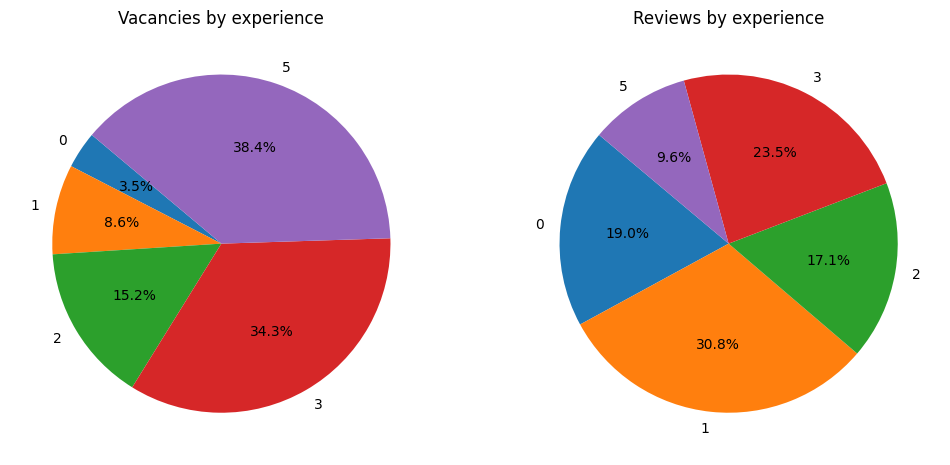

In [22]:
vacancies = df.groupby("experience")["position"].count()
reviews = df.groupby("experience")["reviews"].sum()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(vacancies, labels=vacancies.index, autopct='%1.1f%%', startangle=140)
plt.title("Vacancies by experience")

plt.subplot(1, 2, 2)
plt.pie(reviews, labels=reviews.index, autopct='%1.1f%%', startangle=140)
plt.title("Reviews by experience")
plt.savefig(os.path.join(experience, f"experience{datetime}.png"))
plt.show()

# Companies analysis

These statistics provide information on the total number of companies looking for developers and the top by the number of vacancies

In [23]:
companies = df["company"].unique().shape[0]
print(f"{companies} - the numer of companies looking for python developers")
top5 = df.groupby("company")["position"].count().nlargest(5, "all")
top5

133 - the numer of companies looking for python developers


company
Luxoft         14
Dataforest      7
Adaptiq         6
GlobalLogic     5
Quintagroup     4
Trinetix        4
Name: position, dtype: int64

# Popular vacancies analysis

This information makes it possible to understand the most popular vacancies by the number of views and reviews

In [24]:
top10 = df[["position", "company", "reviews", "link"]].sort_values(by="reviews", ascending=False)[:10]
print(f"Top 10 vacancies by review")
top10

Top 10 vacancies by review


,position,company,reviews,link
70,Data Scrap Specialist (Python),Flai,240,https://djinni.co/jobs/618649-data-scrap-speci...
132,Python Developer,Lumitech,230,https://djinni.co/jobs/617286-python-developer/
21,Python Developer (Junior),Profisea,225,https://djinni.co/jobs/619869-python-developer...
39,Junior Python Developer,GT-Protocol,217,https://djinni.co/jobs/619289-junior-python-de...
46,Junior Python Developer,Forager.ai,213,https://djinni.co/jobs/619249-junior-python-de...
180,Python + Django,JetUp,192,https://djinni.co/jobs/615722-python-django/
44,Junior RPA developer,UAI Labs,185,https://djinni.co/jobs/619246-junior-rpa-devel...
36,Trainee Python/Django Developer,Netframe,185,https://djinni.co/jobs/545313-trainee-python-d...
109,Junior Backend Developer (Python + Django),Devsteam.cloud,165,https://djinni.co/jobs/617671-junior-backend-d...
142,Python Developer,Uni Agency,164,https://djinni.co/jobs/616889-python-developer/


In [25]:
top10 = df[["position", "company", "views", "link"]].sort_values(by="views", ascending=False)[:10]
print(f"Top 10 vacancies by view")
top10

Top 10 vacancies by view


,position,company,views,link
36,Trainee Python/Django Developer,Netframe,867,https://djinni.co/jobs/545313-trainee-python-d...
109,Junior Backend Developer (Python + Django),Devsteam.cloud,778,https://djinni.co/jobs/617671-junior-backend-d...
44,Junior RPA developer,UAI Labs,735,https://djinni.co/jobs/619246-junior-rpa-devel...
132,Python Developer,Lumitech,729,https://djinni.co/jobs/617286-python-developer/
70,Data Scrap Specialist (Python),Flai,714,https://djinni.co/jobs/618649-data-scrap-speci...
39,Junior Python Developer,GT-Protocol,709,https://djinni.co/jobs/619289-junior-python-de...
180,Python + Django,JetUp,626,https://djinni.co/jobs/615722-python-django/
46,Junior Python Developer,Forager.ai,616,https://djinni.co/jobs/619249-junior-python-de...
21,Python Developer (Junior),Profisea,602,https://djinni.co/jobs/619869-python-developer...
184,Junior Python Developer (full stack),Synergy Way,514,https://djinni.co/jobs/615243-junior-python-de...


# Location

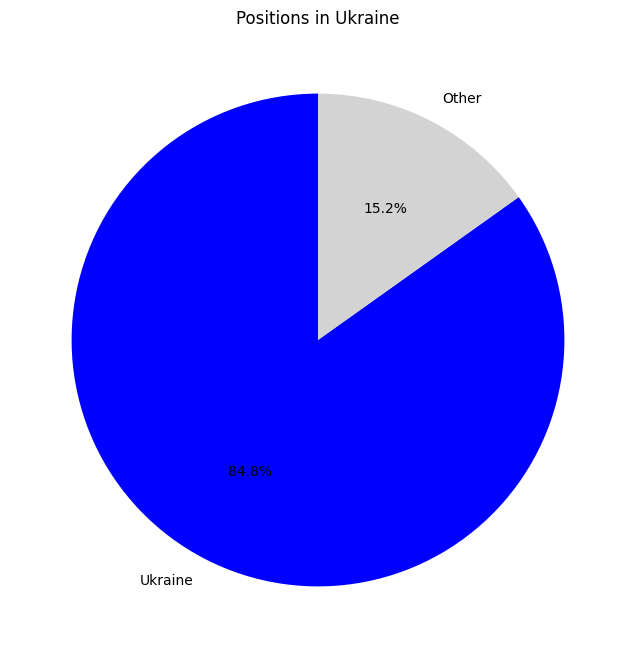

In [26]:
ua = df[df["location"].str.contains("Україна")].shape[0]
plt.figure(figsize=(8, 8))
plt.pie([ua, total - ua], labels=["Ukraine", "Other"],
        autopct='%1.1f%%', startangle=90, colors=["blue", "lightgray"])
plt.title("Positions in Ukraine")
plt.savefig(os.path.join(location, f"country{datetime}.png"))
plt.show()

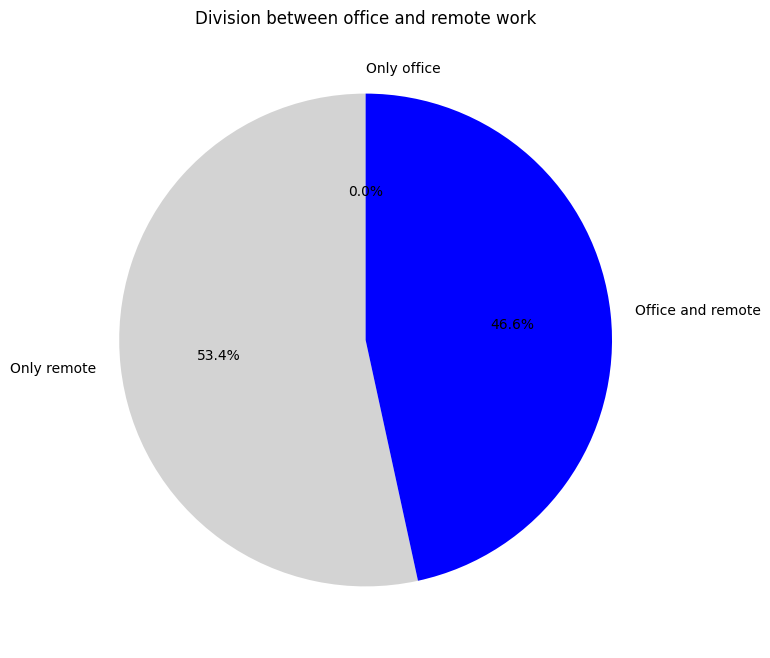

In [27]:
office = df[(df["office"] == 1) & (df["remote"] == 0)].shape[0]
remote = df[(df["office"] == 0) & (df["remote"] == 1)].shape[0]
office_remote = df[(df["office"] == 1) & (df["remote"] == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([office, remote, office_remote], labels=["Only office", "Only remote", "Office and remote"], autopct="%1.1f%%", startangle=90, colors=["blue", "lightgray"])
plt.title("Division between office and remote work")
plt.savefig(os.path.join(location, f"office-remote{datetime}.png"))
plt.show()

# English level

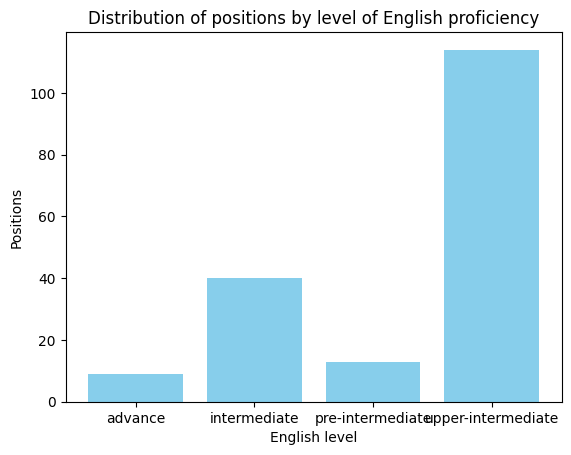

In [28]:
data = df[df["english-level"].notna()]
english_level = data.groupby("english-level")["position"].count()

plt.bar(english_level.index, english_level.values, color="skyblue")
plt.xlabel("English level")
plt.ylabel("Positions")
plt.title("Distribution of positions by level of English proficiency")
plt.savefig(os.path.join(english, f"english{datetime}.png"))
plt.show()

# Technologies analysis

The histogram allows you to see the most common skills among the requirements of companies

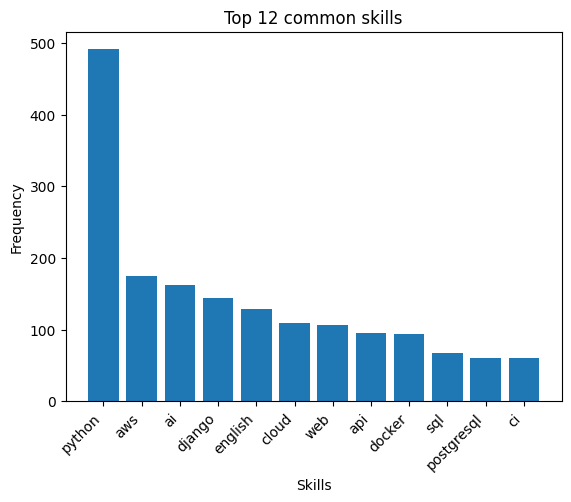

In [29]:
common_words = FreqDist([word for sublist in df["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(12)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 12 common skills")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(requirements, f"common{datetime}.png"))
plt.show()

This information provides an opportunity to analyze the prevalence of specific technologies among vacancies

# Analysis of requirements for vacancies with less than 3 years of work experience

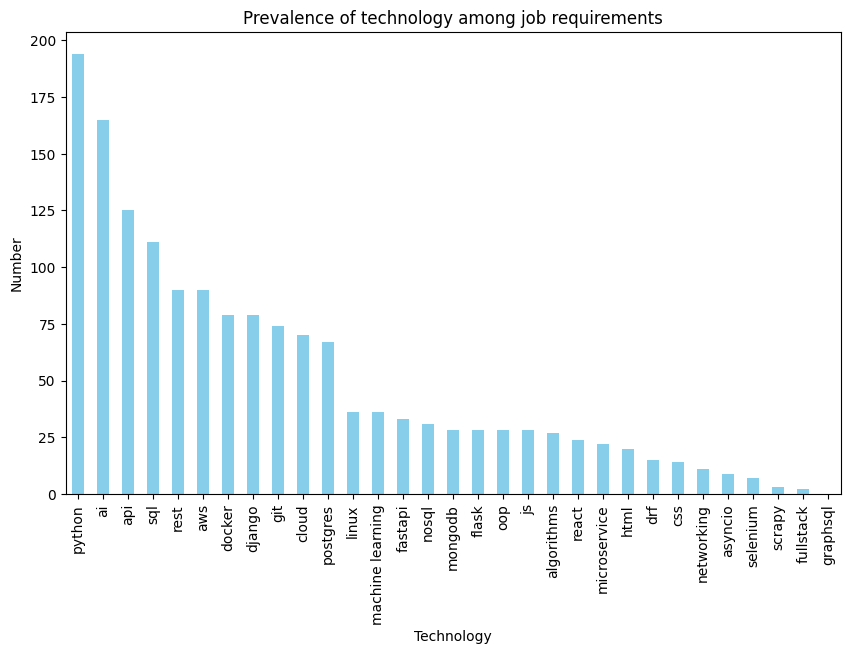

In [31]:
technologies = df[config.technologies].sum()


plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Prevalence of technology among job requirements")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(requirements, f"specific{datetime}.png"))
plt.show()

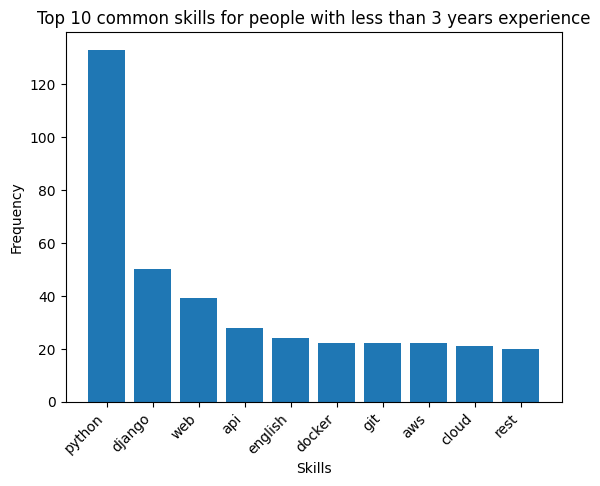

In [32]:
df_less_than_3_years_experience = df[df["experience"] < 3]
common_words = FreqDist([word for sublist in df_less_than_3_years_experience["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 common skills for people with less than 3 years experience")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(junior_skills, f"common{datetime}.png"))
plt.show()

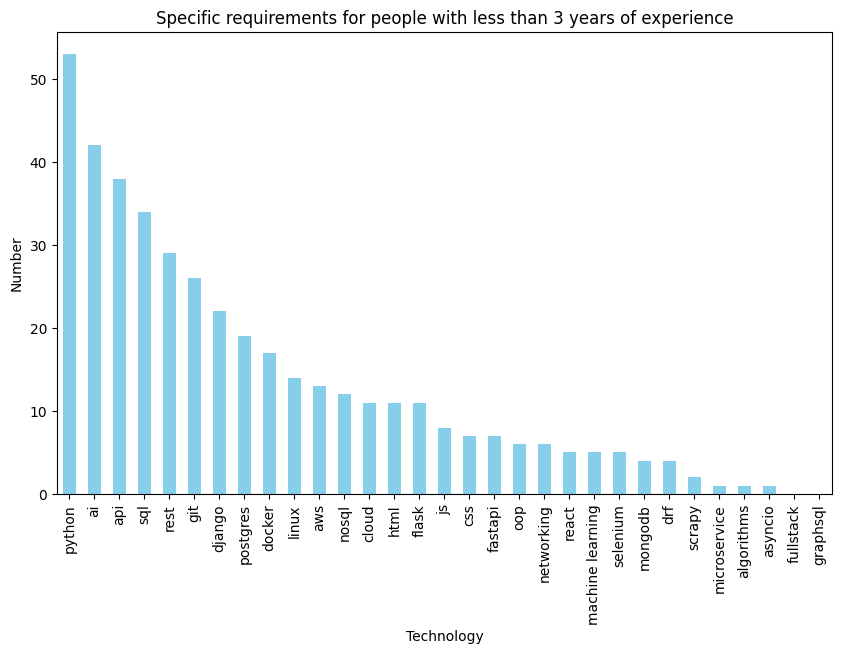

In [33]:
technologies = df[df["experience"] < 3][config.technologies].sum()

plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Specific requirements for people with less than 3 years of experience")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(junior_skills, f"specific{datetime}.png"))
plt.show()

# Analysis of requirements for vacancies with  3 years of work experience

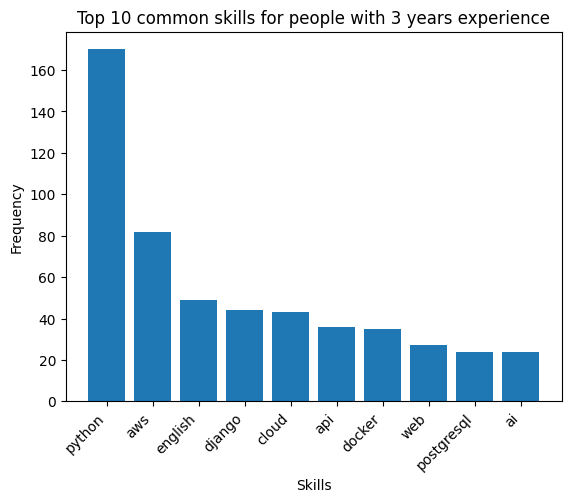

In [35]:
df_3_years_experience = df[df["experience"] == 3]
common_words = FreqDist([word for sublist in df_3_years_experience["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 common skills for people with 3 years experience")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(middle_skills, f"common{datetime}.png"))
plt.show()

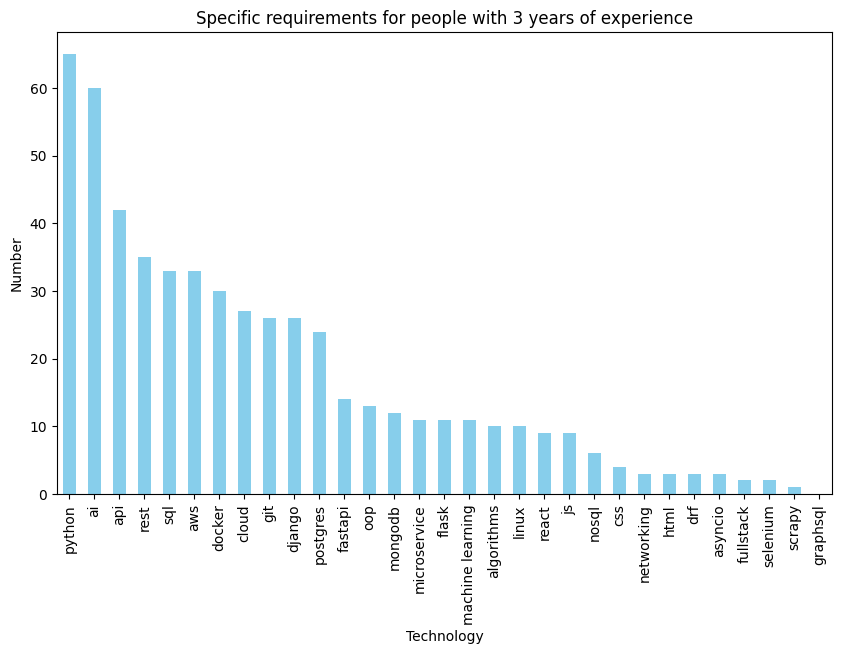

In [36]:
technologies = df[df["experience"] == 3][config.technologies].sum()

plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Specific requirements for people with 3 years of experience")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(middle_skills, f"specific{datetime}.png"))
plt.show()

# Analysis of requirements for vacancies with  3 years of work experience

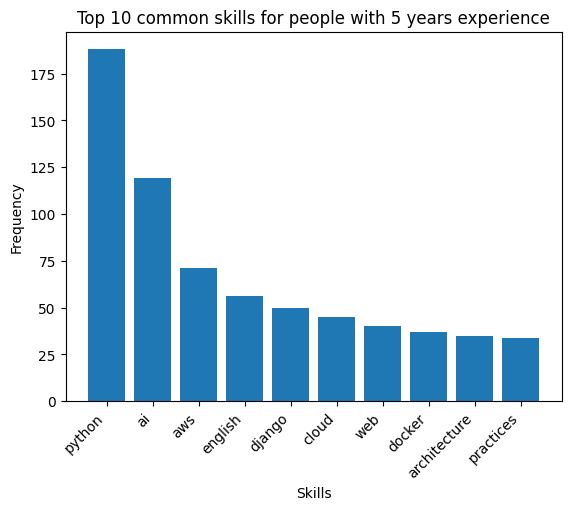

In [37]:
df_5_years_experience = df[df["experience"] == 5]
common_words = FreqDist([word for sublist in df_5_years_experience["filtered_tokens"] for word in sublist])

top_words = common_words.most_common(10)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 common skills for people with 5 years experience")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(senior_skills, f"common{datetime}.png"))
plt.show()

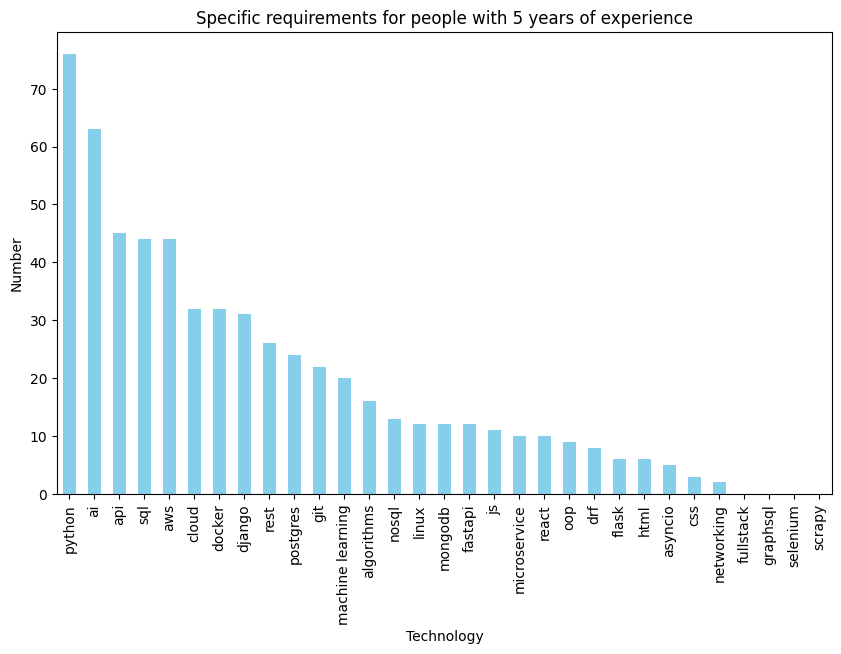

In [38]:
technologies = df[df["experience"] == 5][config.technologies].sum()

plt.figure(figsize=(10, 6))
technologies.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Specific requirements for people with 5 years of experience")
plt.xlabel("Technology")
plt.ylabel("Number")
plt.savefig(os.path.join(senior_skills, f"specific{datetime}.png"))
plt.show()

# Analysis of the relationship between the number of responses to the vacancy and the amount of experience, available technologies in demand

In [40]:
selected_columns = config.technologies.copy()
selected_columns.extend(["experience", "reviews"])
print("As of 01/10/2023, the highest correlation is observed between feedback and experience, feedback and availability of aws. In both cases, the number of responses decreases with the growth of the second indicator")
df[selected_columns].corr()

As of 01/10/2023, the highest correlation is observed between feedback and experience, feedback and availability of aws. In both cases, the number of responses decreases with the growth of the second indicator


,python,git,sql,rest,api,docker,aws,linux,django,postgres,...,algorithms,drf,fastapi,asyncio,graphsql,cloud,selenium,scrapy,experience,reviews
python,1.000000,-0.111676,0.089863,-0.013108,0.113491,0.116996,0.058986,0.067690,0.043688,0.026822,...,0.057058,0.041110,0.064216,3.133426e-02,NaN,0.106187,0.027489,0.017810,0.056526,0.033347
git,-0.111676,1.000000,-0.010198,0.238244,0.179226,0.074076,-0.118169,-0.012303,-0.053834,0.109424,...,-0.033185,0.015542,0.074698,-1.822442e-02,NaN,0.083817,0.021698,-0.010359,-0.153941,0.097744
sql,0.089863,-0.010198,1.000000,0.052021,0.251512,0.222604,0.072457,0.206272,0.284945,0.547114,...,-0.122654,0.176552,0.122873,4.663248e-02,NaN,-0.111589,0.114381,0.109810,-0.010625,0.091841
rest,-0.013108,0.238244,0.052021,1.000000,0.340207,0.064022,0.164815,0.069331,0.105448,0.204624,...,-0.155843,0.198629,0.163299,4.426773e-02,NaN,0.194808,-0.064911,-0.113228,-0.132023,0.019412
api,0.113491,0.179226,0.251512,0.340207,1.000000,0.280610,0.235087,0.007402,0.066832,0.214653,...,-0.092901,0.179228,0.341760,6.624787e-02,NaN,0.280465,0.146298,0.094787,-0.065123,0.028092
docker,0.116996,0.074076,0.222604,0.064022,0.280610,1.000000,0.146875,0.017017,0.115413,0.223809,...,0.006830,0.234452,0.133760,1.192832e-01,NaN,0.174115,0.067413,-0.016630,0.091552,-0.114351
aws,0.058986,-0.118169,0.072457,0.164815,0.235087,0.146875,1.000000,-0.009563,0.001883,0.011693,...,-0.067174,0.083633,0.108866,-4.426773e-03,NaN,0.406975,-0.064911,-0.030194,0.261577,-0.259337
linux,0.067690,-0.012303,0.206272,0.069331,0.007402,0.017017,-0.009563,1.000000,-0.036464,0.161017,...,0.003469,0.013496,-0.035136,8.572408e-02,NaN,-0.047311,0.122476,0.048725,-0.054159,-0.006000
django,0.043688,-0.053834,0.284945,0.105448,0.066832,0.115413,0.001883,-0.036464,1.000000,0.223809,...,-0.023223,0.351382,0.050737,-2.925814e-02,NaN,-0.149490,-0.100133,-0.101061,0.015648,0.095714
postgres,0.026822,0.109424,0.547114,0.204624,0.214653,0.223809,0.011693,0.161017,0.223809,1.000000,...,-0.128656,0.238976,0.081150,4.891439e-02,NaN,-0.037663,-0.021310,-0.001324,-0.040504,0.059067
